In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['text.usetex'] = True

In [2]:
# set up parameters

# range of data
x = np.linspace(0, 1, 500)

# min entropy points under independent model
w0 = 1/2
S = 5
a0 = 1 - 0.5**S

# strong convexity
sig = 4

In [62]:
# strong convexity lower bound: w
grad_H_sc = -sig * (x - w0)

# independence lower bound
grad_H_ind = -np.log(x) + np.log(1-x)

# constraint-based bounds
a, b = 0.2, 0.6
grad_H_cons_lb = grad_H_ind + np.log(a) - np.log(1-a)
grad_H_cons_ub = grad_H_ind + np.log(b) - np.log(1-b)

# truncate last two based on constraints
x_cons_valid = np.logical_and(x >= a, x <= b)

/Users/jmxp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


In [63]:
sns.set_context('talk')
palette = sns.color_palette()

([<matplotlib.axis.XTick at 0x1a21988438>,
 <a list of 3 Text xticklabel objects>)

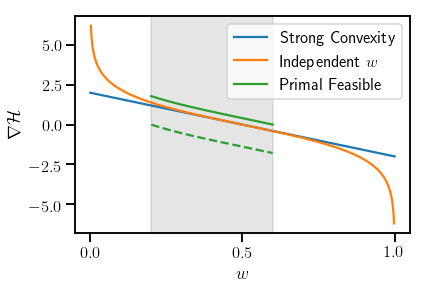

In [81]:
plt.plot(x, grad_H_sc, label='Strong Convexity')
plt.plot(x, grad_H_ind, label = r'Independent $w$')
plt.plot(x[x_cons_valid], grad_H_cons_lb[x_cons_valid], color=palette[2], 
         linestyle='--')
plt.plot(x[x_cons_valid], grad_H_cons_ub[x_cons_valid], color=palette[2], 
         label='Primal Feasible')
# plt.fill_between(x[x_cons_valid], grad_H_cons_lb[x_cons_valid],
#                  grad_H_cons_ub[x_cons_valid], color=palette[0], alpha=0.1)
plt.axvspan(a, b, color='black', alpha=0.1)

plt.xlabel(r"$w$")
plt.ylabel(r"$\nabla\mathcal{H}$")
plt.legend()
plt.xticks([0, 0.5, 1])

([<matplotlib.axis.XTick at 0x1a22327d68>,
 <a list of 3 Text xticklabel objects>)

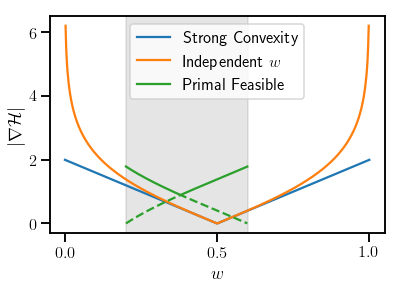

In [82]:
plt.plot(x, np.abs(grad_H_sc), label='Strong Convexity')
plt.plot(x, np.abs(grad_H_ind), label=r'Independent $w$')
abs_grad_H_cons_ub = np.maximum(np.abs(grad_H_cons_lb), np.abs(grad_H_cons_ub))
abs_grad_H_cons_lb = np.minimum(np.abs(grad_H_cons_lb), np.abs(grad_H_cons_ub)) 

plt.plot(x[x_cons_valid], abs_grad_H_cons_lb[x_cons_valid], 
         color=palette[2], linestyle='--')
plt.plot(x[x_cons_valid], abs_grad_H_cons_ub[x_cons_valid], 
         color=palette[2], label='Primal Feasible')
plt.axvspan(a, b, color='black', alpha=0.1)

plt.xlabel(r"$w$")
plt.ylabel(r"$|\nabla\mathcal{H}|$")
plt.legend()
plt.xticks([0, 0.5, 1])